# **Challenge Alura**

O **Desafio Allure Store**, análise de vendas e desempenho de lojas, tem como objetivo **ajudar o Senhor João a decidir qual loja vender para investir em um novo negócio**. Sabemos que grandes empresas, e-commerces e até mesmo você e eu, mesmo sem perceber, tomamos decisões baseadas em dados. E é aí que vem o nosso objetivo. Fui contratado como pessoa analista de dados para ajudar Sr. João a decidir qual loja ele deve vender.



O **Sr. João tem uma rede de quatro lojas**, que pertencem ao e-commerce Alura Store. **Ele quer vender uma dessas lojas** para ter um capital e investir em um novo negócio. Eu, como pessoa analista de dados, vou analisar qual dessas lojas tem o menor desempenho comparado às outras e, baseado nisso, farei um relatório e mostrarei para Sr.João qual loja ele deve vender.

Lembra que mencionei que são quatro lojas que analisarei? Todas essas quatro lojas têm bases de dados e arquivo `csv` para fazer a análise das métricas.

**Estrutura dos Dados:**

O dataset inclui as seguintes informações:

*   **Produto e Categoria:** Itens vendidos e suas classificações.
*   **Preço e Frete:** Valores das vendas e custos associados.
*   **Data de Compra e Local:** Informações temporais e geográficas.
*   **Avaliação da Compra:** Feedback dos clientes.
*   **Tipo de Pagamento e Parcelas:** Métodos utilizados pelos clientes.
*   **Coordenadas Geográficas:** Localização das transações.


**Para isso, eu analisei as seguintes métricas:**

*   Faturamento Total de cada loja
*   Categoria mais populares
*   Média de Avaliação dos clientes
*   Produtos MAIS e MENOS vendidos
*   Custo médio de frete



Com essas métricas, serei capaz de decidir qual loja Sr.João deve vender.

Após a análise de todas as métricas, irei **gerar gráficos**. Utilizando a biblioteca `Matplotlib`, irei gerar três gráficos distintos, sejam um gráfico de pizza, um gráfico de barra, entre outros. Não é necessário fazer um gráfico para cada métrica, mas devem ser três gráficos distintos.

Após essas análises e a criação desses gráficos, estarei pronto para gerar um relatório, indicando qual loja o Sr. João deve escolher para vender e levantar capital para novo investimento.

---



# Arquivo `CSV`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap



url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


FATURAMENTO por LOJA:

Loja 1 - R$ 1,534,509.12
Loja 2 - R$ 1,488,459.06
Loja 3 - R$ 1,464,025.03
Loja 4 - R$ 1,384,497.58



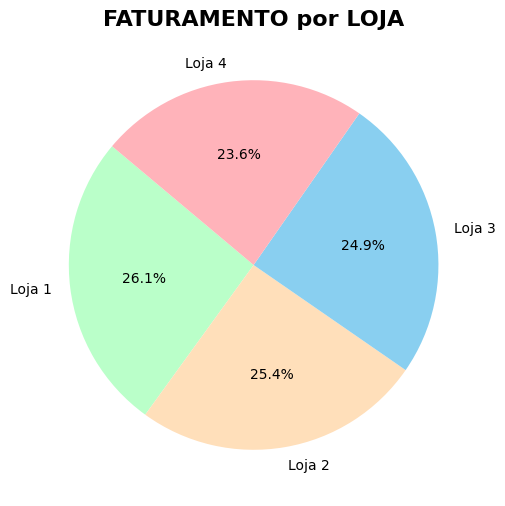

In [138]:
loja1_faturamento = loja1["Preço"].sum().item()
loja2_faturamento = loja2["Preço"].sum().item()
loja3_faturamento = loja3["Preço"].sum().item()
loja4_faturamento = loja4["Preço"].sum().item()

print(f"""\033[1mFATURAMENTO por LOJA\033[0m:

Loja 1 - R$ {loja1_faturamento:,.2f}
Loja 2 - R$ {loja2_faturamento:,.2f}
Loja 3 - R$ {loja3_faturamento:,.2f}
Loja 4 - R$ {loja4_faturamento:,.2f}
""")

todos_faturamentos = [loja1_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Paleta de cores pastel
cores_personalizadas = ["#BAFFC9", "#FFDFBA", "#89CFF0", "#FFB3BA"]

# Define o tamanho da figura (quadrado para centralizar melhor)
plt.figure(figsize=(6, 6))

# Gráfico de pizza
plt.pie(
    todos_faturamentos,
    labels=lojas,
    colors=cores_personalizadas,
    autopct="%1.1f%%",
    startangle=140
)

plt.title("FATURAMENTO por LOJA", fontsize=16, weight='bold')
plt.show()

In [128]:
faturamento_total = loja1_faturamento + loja2_faturamento + loja3_faturamento + loja4_faturamento
print(f"""\033[1mFATURAMENTO TOTAL:\033[0mR$ {faturamento_total:,.2f}""")

FATURAMENTO TOTAL:R$ 5,871,490.79


# 2. Vendas por Categoria


In [122]:
# Carregando as lojas e nomes
lojas = [loja1, loja2, loja3, loja4]
nomes = ['LOJA 1', 'LOJA 2', 'LOJA 3', 'LOJA 4']

# Agrupando por categoria e contando
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]

# Unindo e formatando
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
tabela_final.index = tabela_final.index.str.title()  # Deixa cada palavra em maiúscula
tabela_final = tabela_final.sort_index()

# Cabeçalho com alinhamento e negrito
cabecalho = f"\033[1m{'CATEGORIA DO PRODUTO':<30} {'LOJA 1':>8} {'LOJA 2':>8} {'LOJA 3':>8} {'LOJA 4':>8}\033[0m"
print("\n" + cabecalho)
print("-" * 70)

# Linhas da tabela com alinhamento perfeito
for categoria, linha in tabela_final.iterrows():
    print(f"{categoria:<30} {linha['LOJA 1']:>8} {linha['LOJA 2']:>8} {linha['LOJA 3']:>8} {linha['LOJA 4']:>8}")



CATEGORIA DO PRODUTO             LOJA 1   LOJA 2   LOJA 3   LOJA 4
----------------------------------------------------------------------
Brinquedos                          324      313      315      338
Eletrodomesticos                    312      305      278      254
Eletronicos                         448      422      451      451
Esporte E Lazer                     284      275      277      277
Instrumentos Musicais               182      224      177      170
Livros                              173      197      185      187
Moveis                              465      442      499      480
Utilidades Domesticas               171      181      177      201


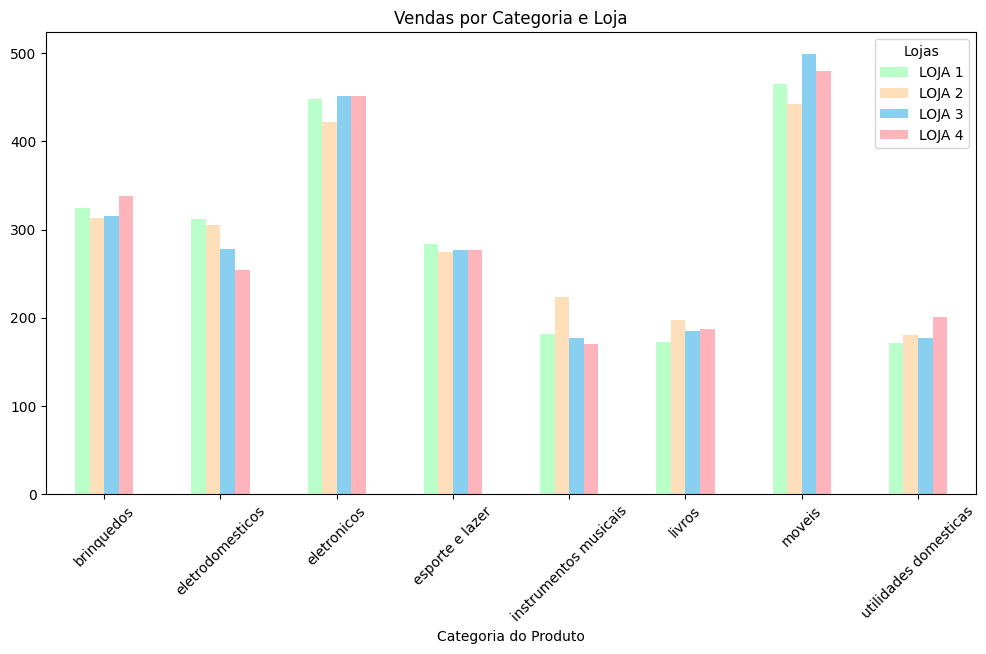

In [121]:
dados = {
    "Categoria do Produto": [
        "brinquedos", "eletrodomesticos", "eletronicos", "esporte e lazer",
        "instrumentos musicais", "livros", "moveis", "utilidades domesticas"
    ],
    "LOJA 1": [324, 312, 448, 284, 182, 173, 465, 171],
    "LOJA 2": [313, 305, 422, 275, 224, 197, 442, 181],
    "LOJA 3": [315, 278, 451, 277, 177, 185, 499, 177],
    "LOJA 4": [338, 254, 451, 277, 170, 187, 480, 201],
}

# Cores personalizadas
cores_personalizadas = ["#BAFFC9", "#FFDFBA", "#89CFF0", "#FFB3BA"]

# Criando o DataFrame
df = pd.DataFrame(dados)
df.set_index("Categoria do Produto", inplace=True)

# Plotando o gráfico com cores personalizadas
ax = df.plot(kind='bar', figsize=(12, 6), color=cores_personalizadas)

# Personalizando o gráfico
plt.title("Vendas por Categoria e Loja")
plt.xticks(rotation=45)
plt.legend(title="Lojas")

# Exibindo o gráfico
plt.show()


# 3. Média de Avaliação das Lojas

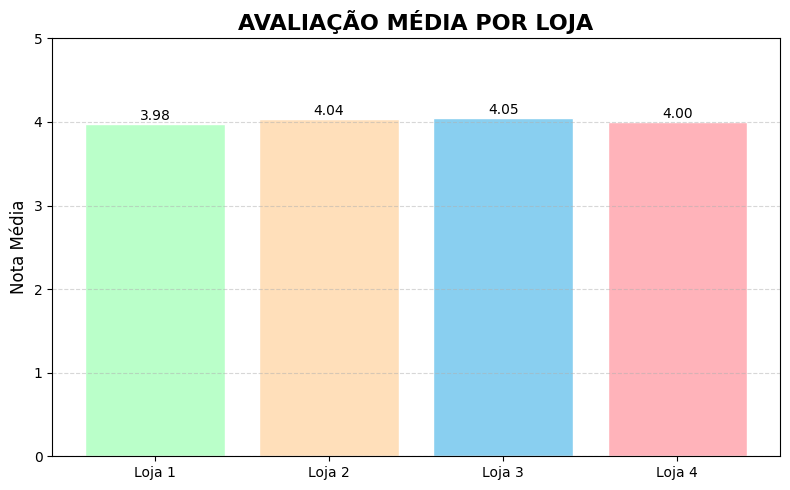



AVALIAÇÃO por LOJA:

Loja 1 - 3.98
Loja 2 - 4.04
Loja 3 - 4.05
Loja 4 - 4.00



In [143]:
# Avaliações médias por loja
avaliacao1 = loja1["Avaliação da compra"].mean().item()
avaliacao2 = loja2["Avaliação da compra"].mean().item()
avaliacao3 = loja3["Avaliação da compra"].mean().item()
avaliacao4 = loja4["Avaliação da compra"].mean().item()

# Dados para o gráfico
avaliacoes = [avaliacao1, avaliacao2, avaliacao3, avaliacao4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ["#BAFFC9", "#FFDFBA", "#89CFF0", "#FFB3BA"]

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(lojas, avaliacoes, color=cores, edgecolor='white')

# Título e rótulos
plt.title("AVALIAÇÃO MÉDIA POR LOJA", fontsize=16, weight='bold')
plt.ylabel("Nota Média", fontsize=12)
plt.ylim(0, 5)  # Avaliação vai de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionando os valores nas barras
for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', fontsize=10)

# Exibir gráfico
plt.tight_layout()
plt.show()

# Imprimindo também no terminal (com título em negrito ANSI)
print(f"""

\033[01mAVALIAÇÃO por LOJA:\033[0m

Loja 1 - {avaliacao1:.2f}
Loja 2 - {avaliacao2:.2f}
Loja 3 - {avaliacao3:.2f}
Loja 4 - {avaliacao4:.2f}
""")


# 4. Produtos Mais e Menos Vendidos

In [112]:
produto_mais1 = loja1["Produto"].value_counts()
produto_mais2 = loja2["Produto"].value_counts()
produto_mais3 = loja3["Produto"].value_counts()
produto_mais4 = loja4["Produto"].value_counts()

resultado = f"""\033[1mPRODUTOS MAIS E MENOS VENDIDOS:\033[0m

- Loja 1 - Produto mais vendido: {produto_mais1.index[0]}
           Produto menos vendido: {produto_mais1.index[-1]}

- Loja 2 - Produto mais vendido: {produto_mais2.index[0]}
           Produto menos vendido: {produto_mais2.index[-1]}

- Loja 3 - Produto mais vendido: {produto_mais3.index[0]}
           Produto menos vendido: {produto_mais3.index[-1]}

- Loja 4 - Produto mais vendido: {produto_mais4.index[0]}
           Produto menos vendido: {produto_mais4.index[-1]}"""

print(resultado)


PRODUTOS MAIS E MENOS VENDIDOS:

- Loja 1 - Produto mais vendido: Micro-ondas
           Produto menos vendido: Celular ABXY

- Loja 2 - Produto mais vendido: Iniciando em programação
           Produto menos vendido: Jogo de tabuleiro

- Loja 3 - Produto mais vendido: Kit banquetas
           Produto menos vendido: Blocos de montar

- Loja 4 - Produto mais vendido: Cama box
           Produto menos vendido: Guitarra


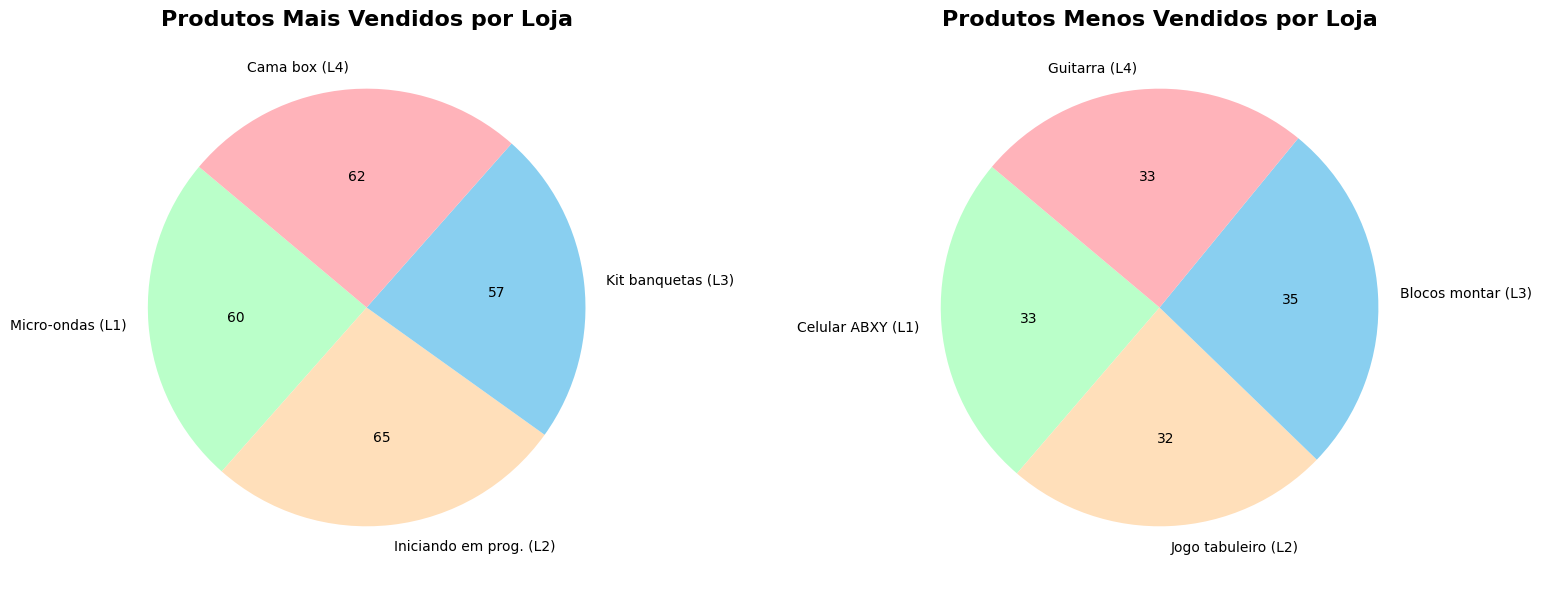

In [115]:
import matplotlib.pyplot as plt

# Dados
produtos_mais = ["Micro-ondas (L1)", "Iniciando em prog. (L2)", "Kit banquetas (L3)", "Cama box (L4)"]
vendas_mais = [60, 65, 57, 62]

produtos_menos = ["Celular ABXY (L1)", "Jogo tabuleiro (L2)", "Blocos montar (L3)", "Guitarra (L4)"]
vendas_menos = [33, 32, 35, 33]

cores_padronizadas = ["#BAFFC9", "#FFDFBA", "#89CFF0", "#FFB3BA"]

# Função para exibir valores absolutos nas fatias da pizza
def only_value_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

# Criar figura maior para mais espaçamento
plt.figure(figsize=(16, 6))

# Gráfico - Produtos Mais Vendidos
plt.subplot(1, 2, 1)
plt.pie(vendas_mais, labels=produtos_mais, autopct=only_value_format(vendas_mais),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Mais Vendidos por Loja', fontsize=16, fontweight='bold')

# Gráfico - Produtos Menos Vendidos
plt.subplot(1, 2, 2)
plt.pie(vendas_menos, labels=produtos_menos, autopct=only_value_format(vendas_menos),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')

# Espaço horizontal entre os gráficos
plt.subplots_adjust(wspace=0.7)
plt.tight_layout()
plt.show()




# 5. Frete Médio por Loja


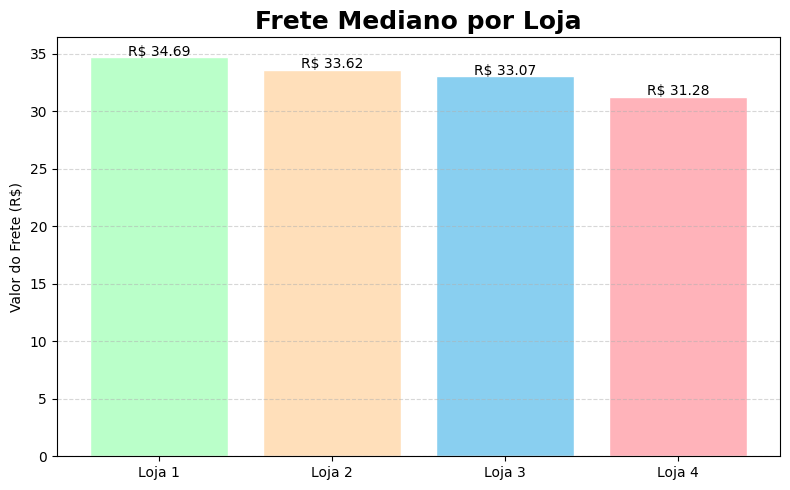


FRETE MEDIO por LOJA:

Loja 1 - R$ 34.69
Loja 2 - R$ 33.62
Loja 3 - R$ 33.07
Loja 4 - R$ 31.28


In [109]:
# Cálculo da mediana do frete para cada loja
fretes = [
    loja1["Frete"].mean(),
    loja2["Frete"].mean(),
    loja3["Frete"].mean(),
    loja4["Frete"].mean()
]

# Definindo os nomes das lojas e as cores do gráfico
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ["#BAFFC9", "#FFDFBA", "#89CFF0", "#FFB3BA"]

# Gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(lojas, fretes, color=cores, edgecolor='white')

# Detalhes do gráfico
plt.title("Frete Mediano por Loja", fontsize=18, weight='bold')
plt.ylabel("Valor do Frete (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores sobre as barras
for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.1, f"R$ {valor:.2f}", ha='center', fontsize=10)

# Exibe o gráfico
plt.tight_layout()
plt.show()

# Exibe o resumo no terminal
print("\n\033[1mFRETE MEDIO por LOJA:\033[0m\n")

for i, loja in enumerate(lojas):
    print(f"{loja} - R$ {fretes[i]:.2f}")



# **Extra!**  Análise de Desempenho Geográfico

In [95]:
from collections import defaultdict

# Coordenadas e cores das lojas
lojas = {
    'Loja 1': [(-23.55, -46.63), (-19.92, -43.94)],
    'Loja 2': [(-18.10, -44.38), (-22.25, -42.66), (-27.45, -50.95), (-30.17, -53.50), (-22.19, -48.79)],
    'Loja 3': [(-5.20, -39.53), (-30.17, -53.50), (-22.19, -48.79), (-13.29, -41.71), (-22.19, -48.79)],
    'Loja 4': [(-22.19, -48.79), (-15.98, -49.86), (-18.10, -44.38), (-18.10, -44.38), (-22.19, -48.79)]
}

cores_lojas = {
    'Loja 1': "#BAFFC9",
    'Loja 2': "#FFDFBA",
    'Loja 3': "#89CFF0",
    'Loja 4': "#FFB3BA"
}

# Cria o mapa
mapa = folium.Map(location=[-22.19, -48.79], zoom_start=5)

# Evita sobreposição
ocorrencias = defaultdict(int)

# Adiciona os marcadores
for loja, coords in lojas.items():
    numero = loja.split()[-1]
    cor = cores_lojas.get(loja, "#CCCCCC")  # Cor padrão se não encontrar

    for lat, lon in coords:
        desloc = 0.03 * ocorrencias[(lat, lon)]
        ocorrencias[(lat, lon)] += 1
        nova_lon = lon + desloc

        # Círculo e número no mesmo ponto
        folium.CircleMarker(
            location=(lat, nova_lon),
            radius=12,
            color='white',
            weight=1,
            fill=True,
            fill_color=cor,
            fill_opacity=0.9
        ).add_to(mapa)

        folium.Marker(
            [lat, nova_lon],
            icon=folium.DivIcon(html=f"""
                <div style="font-size:7pt; font-weight:bold; color:black;
                            text-align:center; transform:translate(-50%,-50%);
                            position:relative; top:50%; left:50%">{numero}</div>
            """)
        ).add_to(mapa)

mapa




# RELATÓRIO

Após análise de todas as métricas, a loja que traz menor retorno financeiro para o Sr. João é a LOJA 4.

**Essa recomendação se baseia em:**


*   Menor faturamento total entre as quatro lojas;
*   Avaliações medianas ou abaixo da média em relação às demais;
*   Produtos com menor popularidade em volume de vendas;
*   Frete com custo médio pouco competitivo, afetando atratividade;
*   E menor diversidade ou alcance geográfico significativo.









Portanto, recomenda-se que o **Sr. João venda a Loja 4** e utilize esse capital para investir em um novo negócio mais promissor.